In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from pandas.plotting import scatter_matrix
import warnings

In [4]:
# Load the dataset
df = pd.read_csv('urine_analysis_1000.csv')

In [5]:
df.head(10)

,id,gravity,ph,osmo,cond,urea,calc,target
0,1,1.028,6.76,631,11.2,422,2.15,1
1,2,1.019,5.47,760,33.8,199,0.81,0
2,3,1.025,5.68,854,29.0,385,3.98,1
3,4,1.015,5.35,559,8.1,301,3.98,0
4,5,1.019,6.13,594,27.6,418,1.49,0
5,6,1.028,6.28,970,35.9,382,4.49,0
6,7,1.020,5.94,774,29.0,325,3.98,1
7,8,1.011,7.01,395,26.0,95,1.53,0
8,9,1.028,6.76,631,11.2,422,2.15,1
9,10,1.021,5.53,775,29.0,302,3.34,0


In [6]:
df.shape

(999, 8)

In [7]:
df.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [8]:
# checking for duplicates (row entries)
print('Duplicate values:', df.duplicated().sum())

# checking for null values
print('Null values:', df.isnull().sum())

Duplicate values: 0
Null values: id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64


In [9]:
df['target'].value_counts()

,count
target,
0,527
1,472


In [10]:
# checking for no. of unique values present in each of the features
df.nunique()

,0
id,999
gravity,29
ph,72
osmo,80
cond,67
urea,73
calc,85
target,2


In [11]:
df = df.drop('id', axis=1)

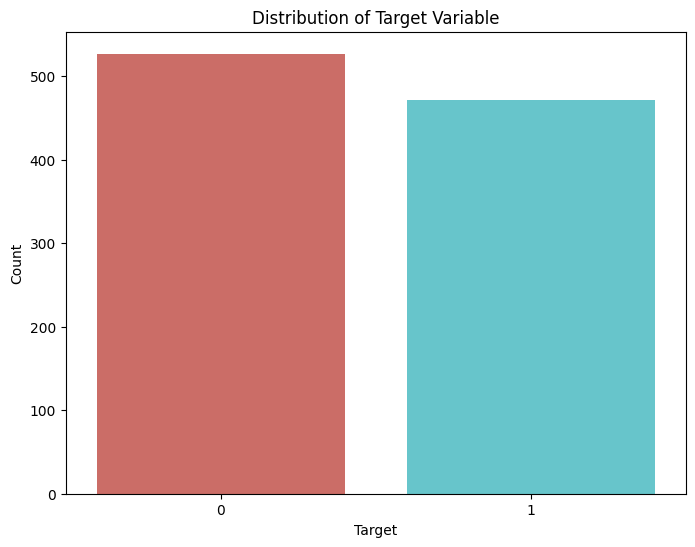

In [12]:
# 1. Distribution of the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x=df['target'], hue=df['target'], palette='hls', legend=False)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

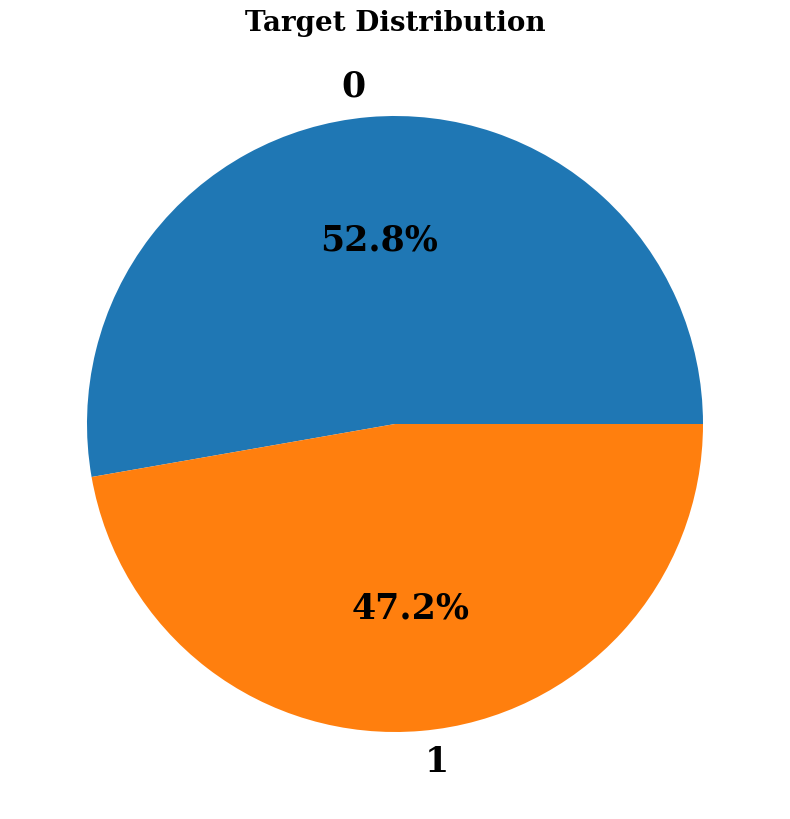

In [13]:
#2 Visualize the distribution of the target column using a pie chart
plt.figure(figsize=(10, 10))
plt.pie(x=df['target'].value_counts(),
        labels=df['target'].value_counts().index,
        autopct="%1.1f%%",
        textprops={'fontsize': 25, 'color': 'black', 'weight': 'bold', 'family': 'serif'})
plt.title('Target Distribution', size=20, fontname='serif', weight='bold')
plt.show()


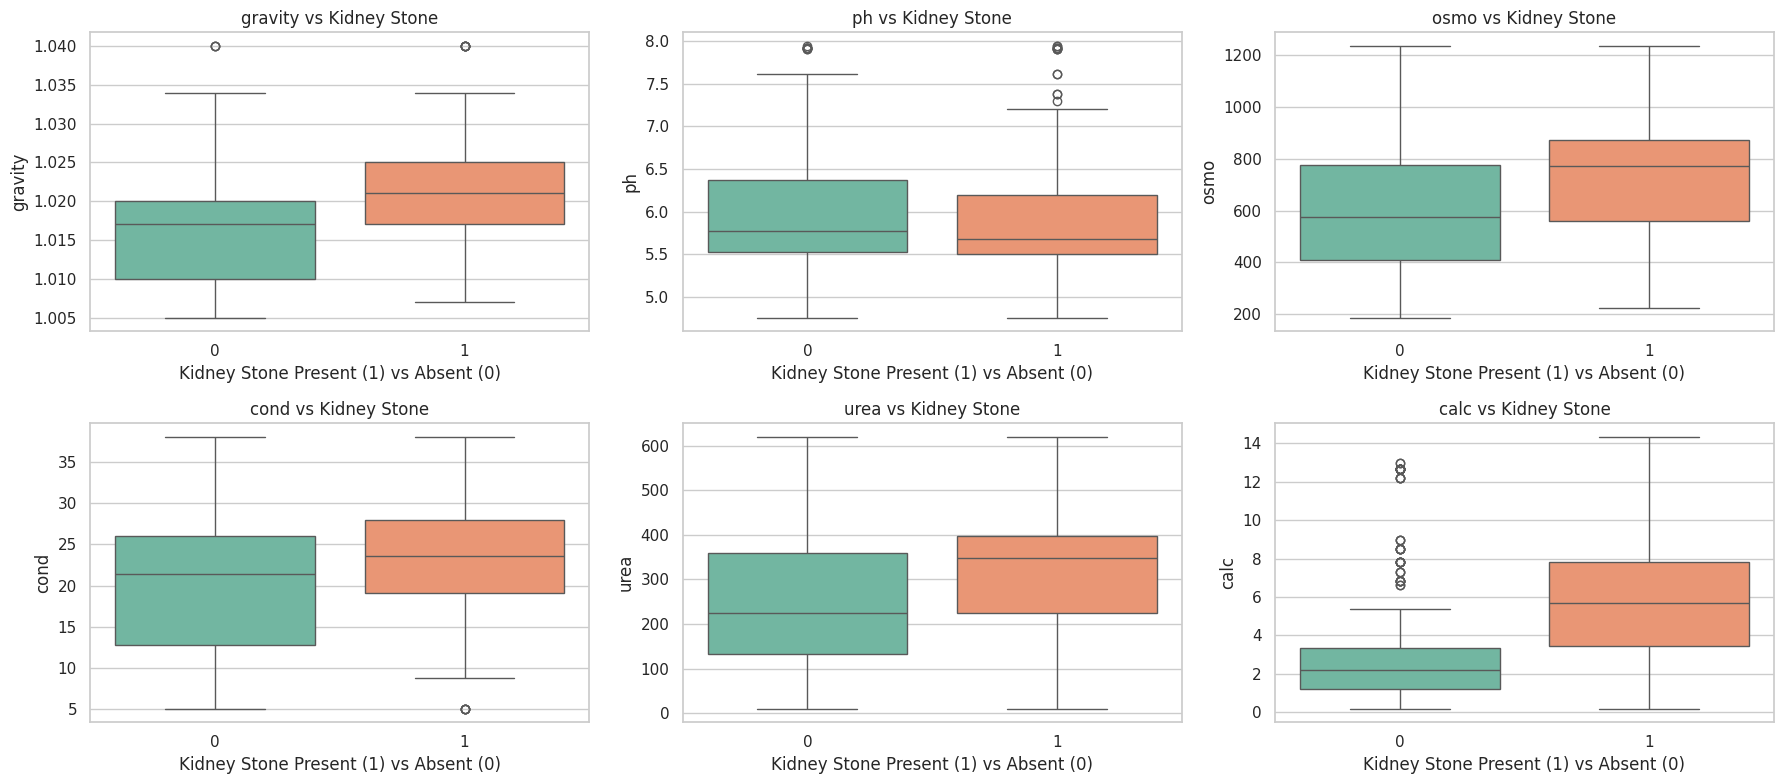

In [14]:
import math
# Set Seaborn style
sns.set(style="whitegrid")

# Load your dataset
# df = pd.read_csv("your_dataset.csv")  # Uncomment and modify if needed

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove target if it's among them
if 'target' in numeric_cols:
    numeric_cols.remove('target')

# Define number of plots per row and figure size
cols = 3  # You can change this to 2, 4, etc.
rows = math.ceil(len(numeric_cols) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
axes = axes.flatten()  # Flatten in case of single row

# Plot all boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='target', y=col, data=df, hue='target', palette="Set2", legend=False, ax=axes[i])
    axes[i].set_title(f'{col} vs Kidney Stone')
    axes[i].set_xlabel("Kidney Stone Present (1) vs Absent (0)")
    axes[i].set_ylabel(col)

# Turn off any extra unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

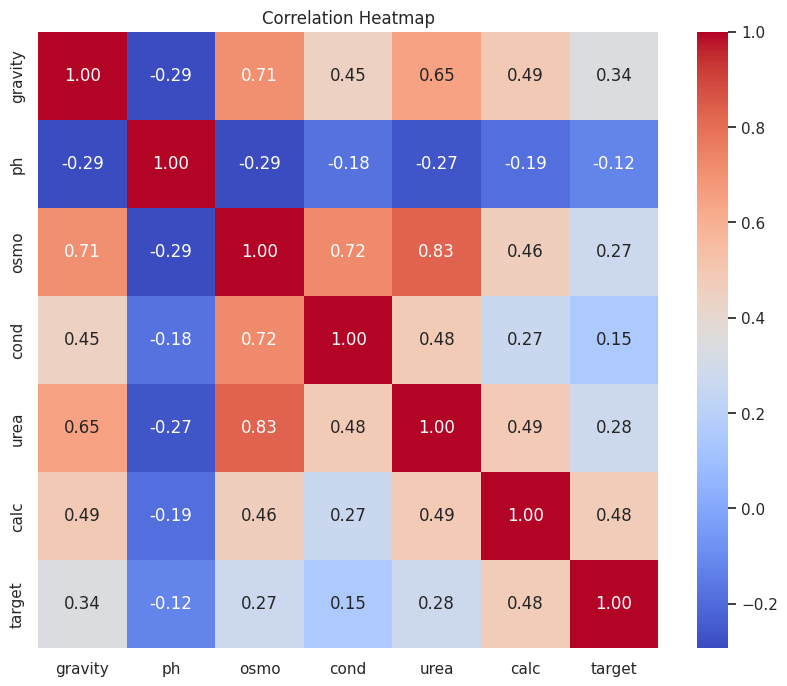

In [15]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 4. Pairplot (to visualize relationships between features)
sns.pairplot(df, hue='target', palette='hls')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [ ]:
# 5. Distribution of Numerical Features (Histograms)
numerical_features = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# 6. Boxplots for Numerical Features (to detect outliers)
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], color='orange')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [ ]:
# 7. Scatter Plots (to visualize relationships between pairs of features)
# Example: Scatter plot of 'osmo' vs 'urea' colored by target
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['osmo'], y=df['urea'], hue=df['target'], palette='hls')
plt.title('Scatter Plot: Osmo vs Urea')
plt.xlabel('Osmo')
plt.ylabel('Urea')
plt.legend(title='Target')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle

In [ ]:
# Feature Engineering
# 1. Interaction Terms
df['urea_calc_squared'] = df['urea'] * (df['calc'] ** 2)  # Non-linear interaction
df['osmo_urea_interaction'] = df['osmo'] * df['urea']     # Strong correlated pair
df['cond_calc_ratio'] = df['cond'] / df['calc']           # Conductivity-calcium relationship

# 2. Clinical pH Binning (Based on stone formation ranges)
df['ph_category'] = pd.cut(df['ph'],
                          bins=[0, 5.5, 6.5, 14],  # More clinical relevance
                          labels=['acidic', 'neutral', 'alkaline'])
df = pd.get_dummies(df, columns=['ph_category'], drop_first=True)

# 3. Concentration Indicators
df['total_solid_score'] = (df['osmo'] + df['gravity'] + df['cond']) / 3
df['calc_osmo_ratio'] = df['calc'] / df['osmo']  # Calcium concentration relative to osmolality

# 4. Polynomial Features (For non-linear relationships)
df['calc_squared'] = df['calc'] ** 2
df['urea_sqrt'] = np.sqrt(df['urea'])

# 5. Drop ID column
df.drop('id', axis=1, inplace=True, errors='ignore')

# 6. Train-Test Split FIRST to prevent data leakage
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Scaling AFTER Split
cont_features = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc',
                'urea_calc_squared', 'osmo_urea_interaction',
                'cond_calc_ratio', 'total_solid_score', 'calc_osmo_ratio',
                'calc_squared', 'urea_sqrt']

scaler = StandardScaler()
X_train[cont_features] = scaler.fit_transform(X_train[cont_features])
X_test[cont_features] = scaler.transform(X_test[cont_features])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, ConfusionMatrixDisplay  # <-- ADD THIS
import matplotlib.pyplot as plt

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}

lr = LogisticRegression(random_state=42)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='recall', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

best_lr = grid_search_lr.best_estimator_
print("Best LR Parameters:", grid_search_lr.best_params_)

# Evaluate
y_pred_lr = best_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_estimator(best_lr, X_test, y_test, cmap='Reds')
plt.title('LR Confusion Matrix')
plt.show()


# For Logistic Regression
print("\nLogistic Regression Classifier Performance:")
print('Accuracy:', accuracy_score(y_test, y_pred_lr))  # Changed y_pred to y_pred_lr
print('Precision:', precision_score(y_test, y_pred_lr))
print('Recall:', recall_score(y_test, y_pred_lr))
print('F1 Score:', f1_score(y_test, y_pred_lr))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lr))
print('Classification Report:\n', classification_report(y_test, y_pred_lr))

In [ ]:
# SVM

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)

def plot_confusion_matrix(y_true, y_pred, classes=None, title='Confusion Matrix'):
    """Generate and plot a confusion matrix with annotations."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                xticklabels=classes if classes else ['Negative', 'Positive'],
                yticklabels=classes if classes else ['Negative', 'Positive'])
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Create SVM pipeline with standardization
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Crucial for SVM performance
    ('svm', SVC(random_state=42,
                class_weight='balanced',  # Handles class imbalance
                probability=True))  # Enable probability estimates
])

# Hyperparameter grid for tuning
param_grid = {
    'svm__C': [0.1, 1, 10],  # Regularization parameter
    'svm__kernel': ['rbf', 'poly'],  # Kernel type
    'svm__gamma': ['scale', 'auto']  # Kernel coefficient
}

# Grid search with 5-fold cross-validation
svm_grid = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Train the model
svm_grid.fit(X_train, y_train)

# Best model from grid search
best_svm = svm_grid.best_estimator_

# Generate predictions
y_pred_svm = best_svm.predict(X_test)

# Performance metrics
print("\nSVM Performance:")
print(f"Best Parameters: {svm_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm):.4f}")

# Confusion matrix visualization
plot_confusion_matrix(y_test, y_pred_svm,
                     classes=['No Kidney Stone', 'Kidney Stone'],
                     title='SVM Confusion Matrix')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm,
                            target_names=['No Kidney Stone', 'Kidney Stone']))

In [ ]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best RF Parameters:", grid_search.best_params_)

# Evaluate
from sklearn.metrics import classification_report, ConfusionMatrixDisplay  # <-- ADD THIS
import matplotlib.pyplot as plt

# Random Forest Evaluation
y_pred_rf = best_rf.predict(X_test)
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap='Blues')
plt.title('RF Confusion Matrix')
plt.show()


print("Random Forest Classifier Performance:")
print('Accuracy:', accuracy_score(y_test, y_pred_rf))  # Changed y_pred to y_pred_rf
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.barh(range(len(feature_names)), importances[indices][::-1], align="center")
plt.yticks(range(len(feature_names)), feature_names[indices][::-1])
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
# Install required packages if needed
# !pip install xgboost matplotlib seaborn

import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
from sklearn.model_selection import GridSearchCV

def plot_confusion_matrix(y_true, y_pred, classes=None, title='Confusion Matrix'):
    """Generate and plot a confusion matrix with annotations."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes if classes else ['Negative', 'Positive'],
                yticklabels=classes if classes else ['Negative', 'Positive'])
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Initialize and tune XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=50,
    eval_metric='logloss'
)

param_grid = {
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
best_xgb = grid_search.best_estimator_

# Generate predictions
y_pred = best_xgb.predict(X_test)

# Performance metrics
print("Optimized XGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Confusion matrix visualization
plot_confusion_matrix(y_test, y_pred,
                     classes=['No Kidney Stone', 'Kidney Stone'],
                     title='XGBoost Confusion Matrix')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Kidney Stone', 'Kidney Stone']))

# Feature importance
xgb.plot_importance(best_xgb, importance_type='weight')
plt.show()

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

def plot_roc_curve(y_true, y_probs, model_name):
    """Plot ROC curve with AUC score"""
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve - Kidney Stone Prediction')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()
    return roc_auc

# Initialize models with preprocessing
models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "Support Vector Machine": Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(probability=True, random_state=42))
    ]),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(learning_rate=0.01, max_depth=3, random_state=42)
}

# Train models and plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

for name, model in models.items():
    model.fit(X_train, y_train)

    # Get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)
        y_probs = (y_probs - y_probs.min()) / (y_probs.max() - y_probs.min())

    # Calculate metrics
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Plot curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Final plot formatting
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC Curve Comparison - Kidney Stone Prediction', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import os
import pickle

# Define path
model_dir = "/content/drive/MyDrive/models"
model_path = os.path.join(model_dir, "best_random_forest_model.pkl")

# Create the folder if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the model
with open(model_path, "wb") as f:
    pickle.dump(best_rf, f)

print(f"✅ Model saved successfully at: {model_path}")


In [ ]:
scaler_model_path = os.path.join(model_dir, "scaler.pkl")

# Create the folder if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the model
with open(scaler_model_path, "wb") as f:
    pickle.dump(scaler, f)
print(f"✅ Model saved successfully at: {scaler_model_path}")